In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv('..\\energydata_realenergydata.csv')

In [6]:
energy = data[['meter_id','w_timestamp (sent)','energy']]

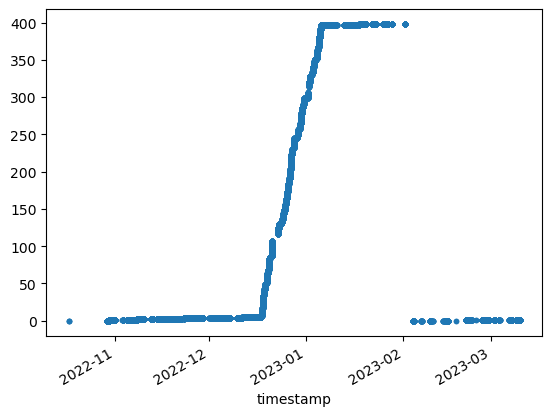

In [284]:
# Working on AED201 meter
aed201 = energy[energy['meter_id']=='AED201'].copy()

aed201.drop('meter_id',axis=1,inplace=True)

aed201.rename(columns={'w_timestamp (sent)':'timestamp'},inplace=True)

aed201['timestamp'] = pd.to_datetime(aed201['timestamp'])

aed201.set_index('timestamp',inplace=True)

aed201['energy'].plot(style='.')
plt.show()

In [285]:
aed201.reset_index(inplace=True)

df = aed201.copy()

In [288]:
# Perform differentiation to get exact energy

time_diff = (df['timestamp'] - df['timestamp'].shift()).fillna(pd.Timedelta(seconds=0))
time_diff = time_diff.apply(lambda x: x.total_seconds())

energy_diff = df['energy'].diff().fillna(0)

energy_rate = energy_diff/time_diff

df['exact_energy'] = energy_rate.cumsum()

In [290]:
# prepare data for clustering
df= df.drop('energy',axis=1).set_index('timestamp')

df = df.fillna(method='bfill')

df_hourly = df.resample('H').sum()

df_hourly['hour'] = df_hourly.index.hour
df_hourly.index = df_hourly.index.date

df_hourly_pivot = df_hourly.pivot(columns='hour').fillna(0)

df_hourly_pivot['exact_energy'].T

,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,...,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09,2023-03-10
hour,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,360.791330,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,426.732970
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,268.958176,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,433.324306
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,104.999463,0.000000,0.000000,6.565764
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
8,0.000081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000


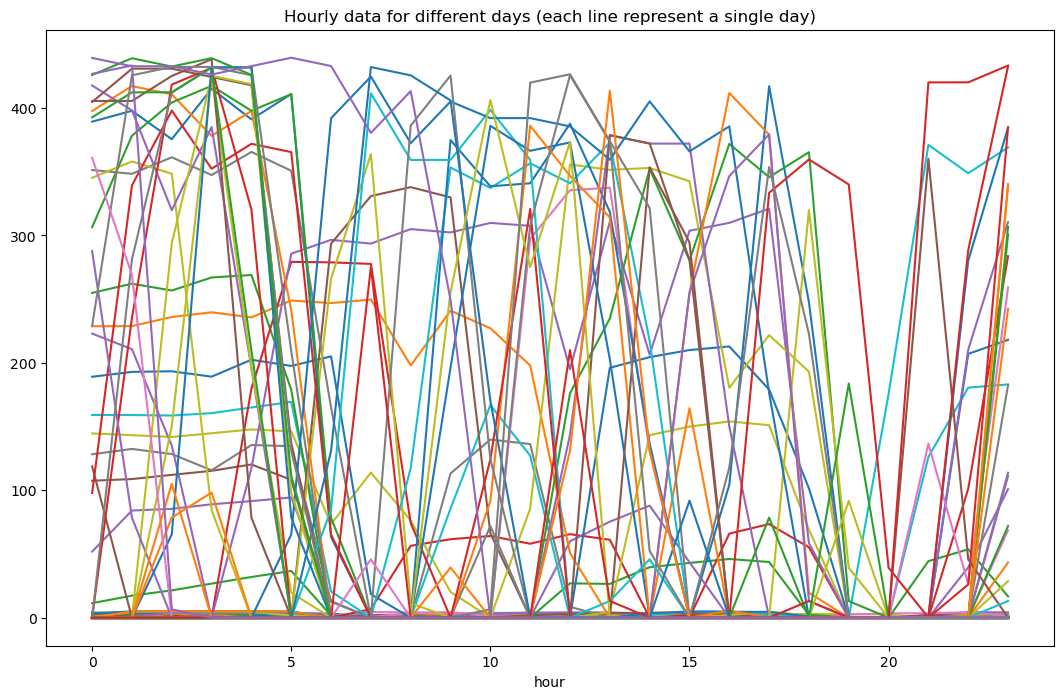

In [291]:
df_hourly_pivot['exact_energy'].T.plot(figsize=(13,8), legend=False)
plt.title('Hourly data for different days (each line represent a single day)')
plt.show()

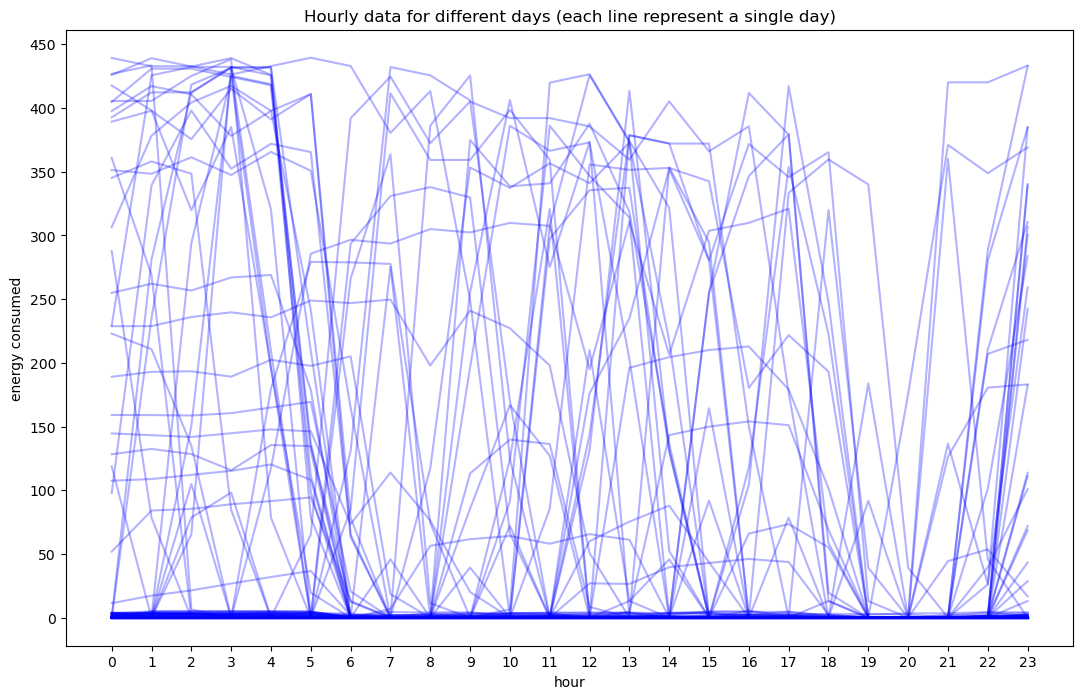

In [261]:
df_hourly_pivot['exact_energy'].T.plot(figsize=(13,8), color ='blue',legend=False, alpha=0.3)
plt.title('Hourly data for different days (each line represent a single day)')
plt.xticks(np.arange(0,24))
plt.yticks(np.arange(0,500,50))
plt.ylabel('energy consumed')
plt.show()

### Clustering

In [262]:
# import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [263]:
sil_scores = []
n_cluster_list = np.arange(2,31).astype(int)

In [264]:
X = df_hourly_pivot.values.copy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

In [269]:
sils = pd.Series(sil_scores,index=n_cluster_list)

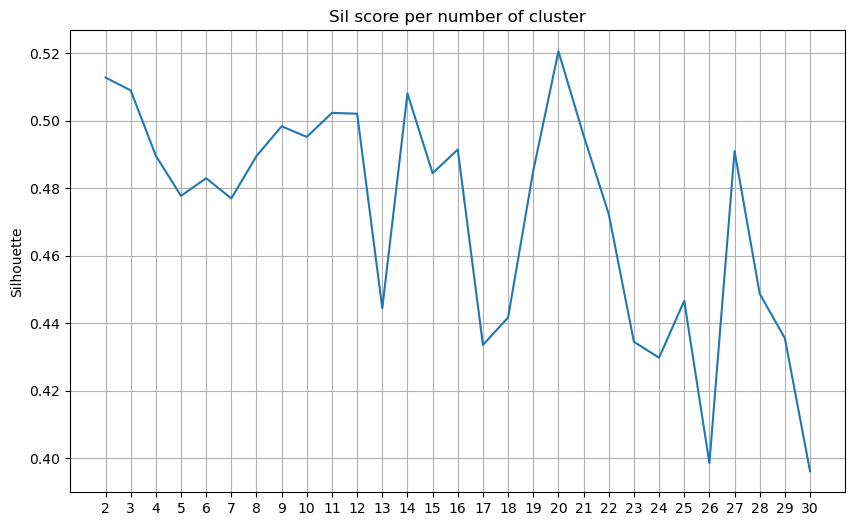

In [270]:
sils.plot(figsize=(10,6))
plt.xticks(n_cluster_list)
plt.title('Silhouette score per number of cluster')
plt.ylabel('Silhouette')
plt.grid()
plt.show()

In [299]:
kmeans = KMeans(n_clusters=12)
cluster_found = kmeans.fit_predict(X)

cluster_series = pd.Series(cluster_found,name='cluster')

df_hourly_pivot1 = df_hourly_pivot.set_index(cluster_series,append=True)

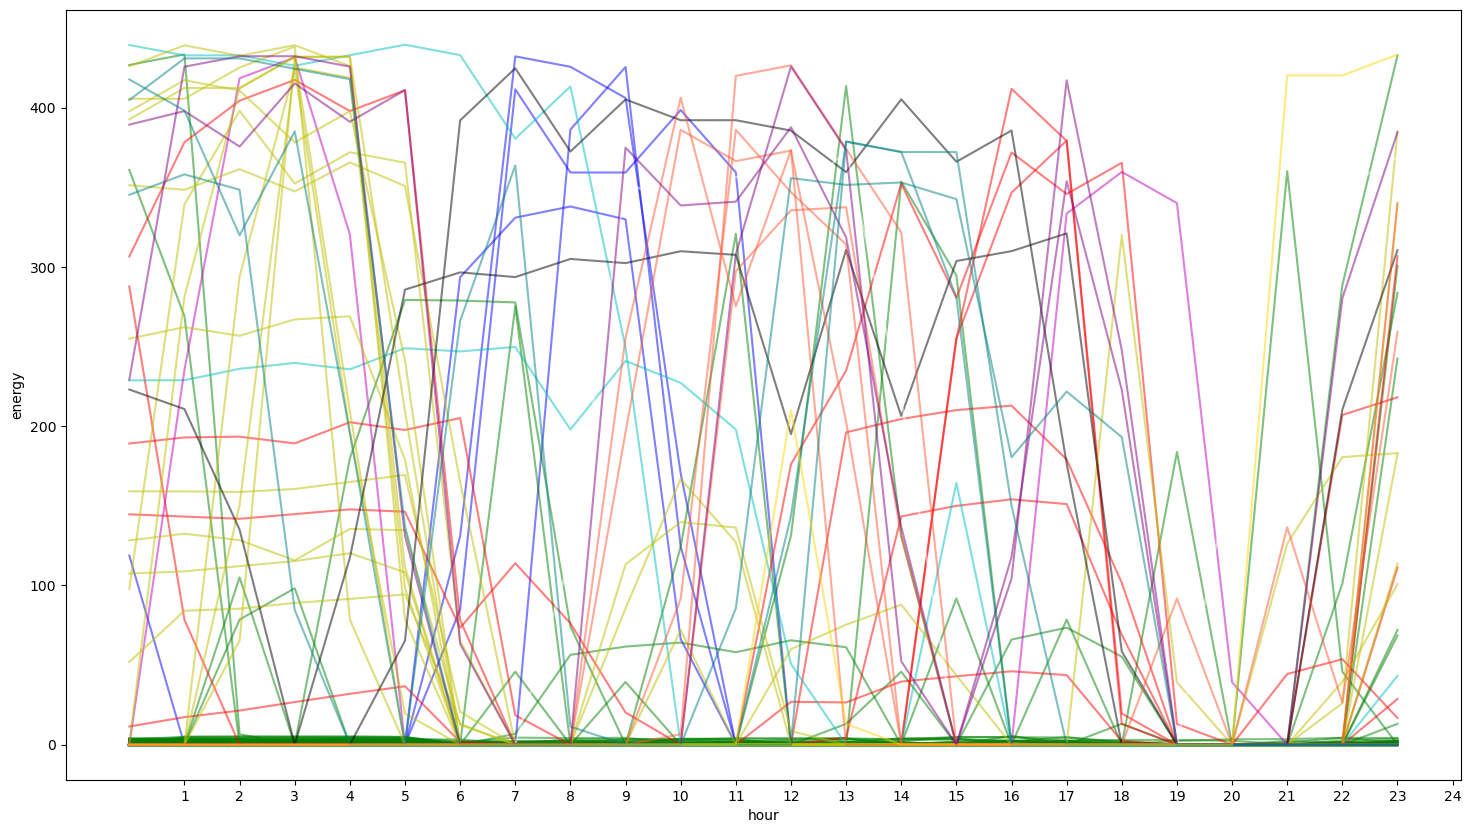

In [300]:
fig, ax = plt.subplots(1,1,figsize=(18,10))
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', '#FF5733', '#800080', '#008080', '#FFD700']


cluster_values = sorted(df_hourly_pivot1.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values,color_list):
    df_hourly_pivot1['exact_energy'].xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.5, color=color,
                                                                 label=f'Cluster{cluster}')
#     df_hourly_pivot1['exact_energy'].xs(cluster, level=1).median().plot(ax=ax, color=color,
#                                                        alpha=0.5, ls='-')
ax.set_xticks(np.arange(1,25))
ax.set_ylabel('energy')
ax.set_xlabel('hour')
# ax.legend()
plt.show()

In [302]:
df

,exact_energy
timestamp,
2022-10-17 08:49:15+01:00,0.000009
2022-10-17 08:50:09+01:00,0.000009
2022-10-17 08:51:03+01:00,0.000024
2022-10-17 08:51:57+01:00,0.000039
2022-10-29 14:52:26+01:00,0.000039
...,...
2023-03-10 01:56:33+01:00,6.565734
2023-03-10 01:57:27+01:00,6.565740
2023-03-10 01:58:21+01:00,6.565749


In [306]:
from scipy.spatial import Voronoi, voronoi_plot_2d
df1 = df.reset_index()
# get the time stamps of the data points
time_stamps = df1['timestamp'].values.reshape(-1, 1)

# create a k-means model with 12 clusters
kmeans = KMeans(n_clusters=12, random_state=0).fit(time_stamps)

# create a Voronoi diagram based on the cluster centers
cluster_centers = kmeans.cluster_centers_
vor = Voronoi(cluster_centers.reshape(1,-1))

# plot the Voronoi diagram with the color map of the clusters
fig, ax = plt.subplots(figsize=(10,10))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=2, point_size=2)
plt.scatter(time_stamps, df['energy'], c=kmeans.labels_, cmap='rainbow', alpha=0.5)
plt.colorbar()
plt.title('Voronoi Map with 12 Clusters')
plt.xlabel('Time Stamp')
plt.ylabel('Energy')
plt.show()


QhullError: QH6214 qhull input error: not enough points(1) to construct initial simplex (need 14)

While executing:  | qhull v Qbb Qx Qz Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 304179046  voronoi  Qbbound-last  Qxact-merge  Qz-infinity-point
  Qcoplanar-keep  _zero-centrum  Qinterior-keep  Q3-no-merge-vertices-dim-high
  _maxoutside  0
